In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import random
import matplotlib.image as img
import matplotlib.pyplot as plt
import keras 
from keras.models import Sequential
import cv2


from tensorflow.keras.layers import Dropout, Dense,BatchNormalization, Flatten, MaxPool2D, GlobalMaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, Callback
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.applications.vgg16 import VGG16 
from tensorflow.keras.applications.vgg16 import preprocess_input 

from keras.layers import Conv2D, Reshape
from tensorflow.keras.utils import Sequence
from keras.backend import epsilon
from sklearn.model_selection import train_test_split
import seaborn as sns
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras import optimizers,losses
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras import Model

In [2]:
X_train_dir = 'X_train'
y_train_dir = 'y_train'
X_test_dir = 'X_test'
y_test_dir = 'y_test'

train_class = os.listdir(X_train_dir)
test_class = os.listdir(y_test_dir)

white_shoes_train_path = 'X_train/Train_White_Shoes'
black_shoes_train_path = 'X_train/Train_Black_Shoes'

white_shoes_test_path = 'y_test/Test_White_Shoes'
black_shoes_test_path = 'y_test/Test_Black_Shoes'

print(train_class)



['Train_Black_Shoes', 'Train_White_Shoes']


In [3]:
os.listdir(white_shoes_train_path)

['train_white_shoe1.png',
 'train_white_shoe10.png',
 'train_white_shoe11.png',
 'train_white_shoe12.png',
 'train_white_shoe13.png',
 'train_white_shoe14.png',
 'train_white_shoe2.png',
 'train_white_shoe3.png',
 'train_white_shoe4.png',
 'train_white_shoe5.png',
 'train_white_shoe6.png',
 'train_white_shoe7.png',
 'train_white_shoe8.png',
 'train_white_shoe9.png']

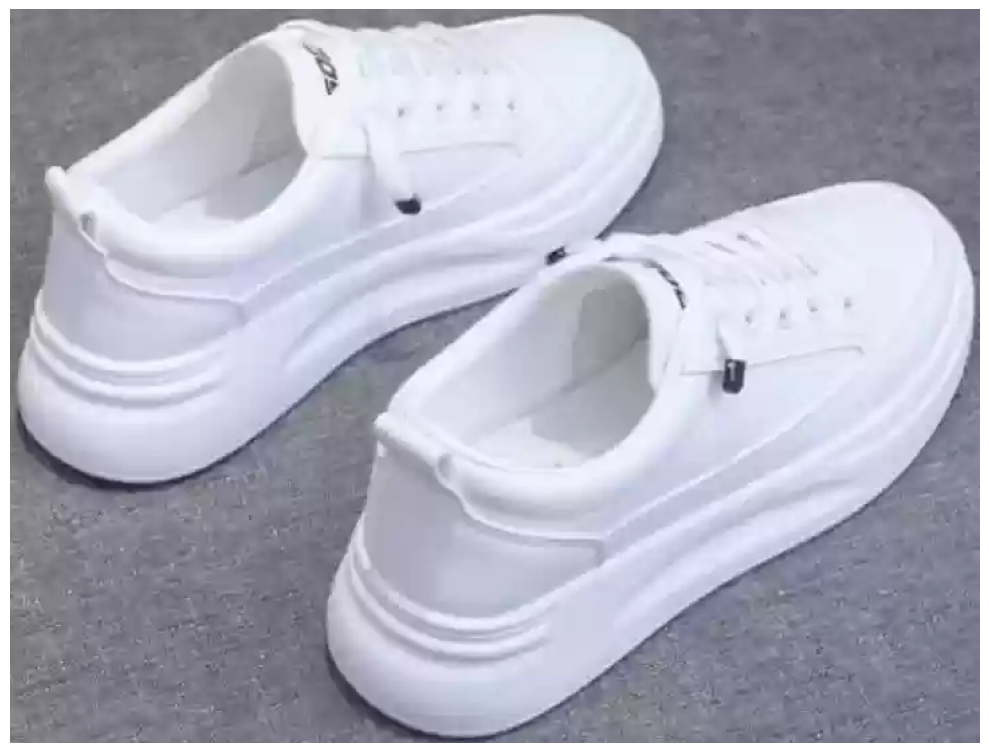

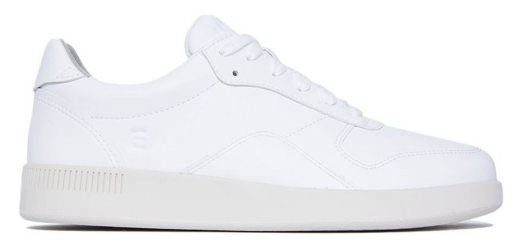

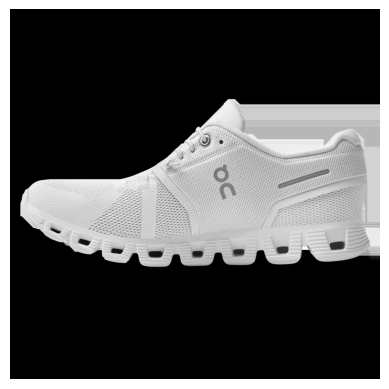

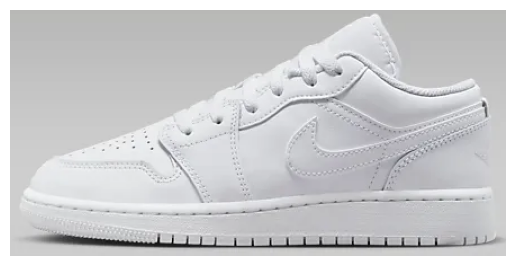

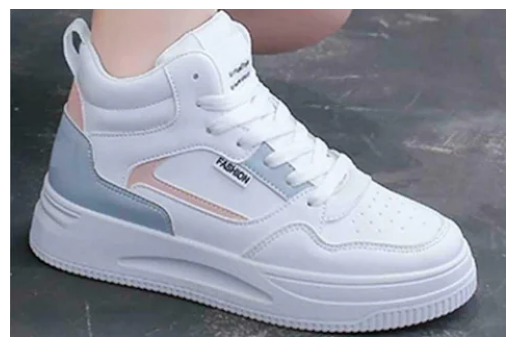

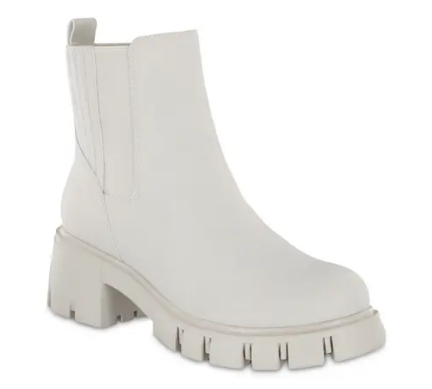

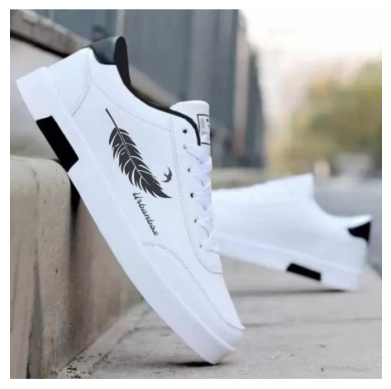

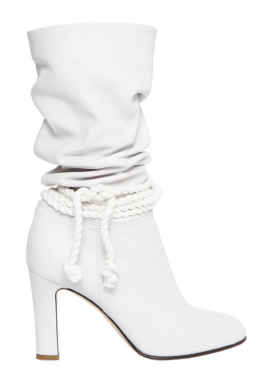

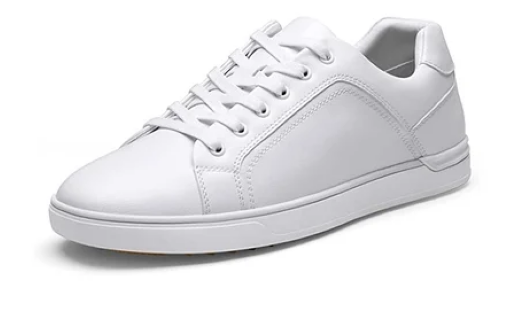

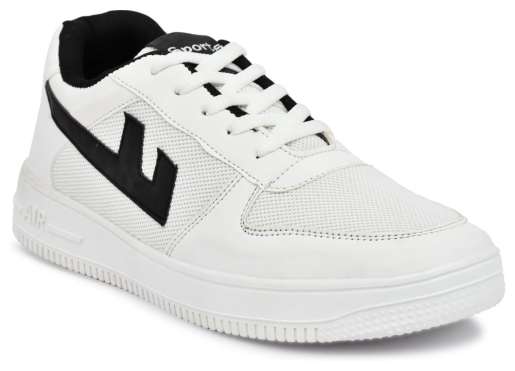

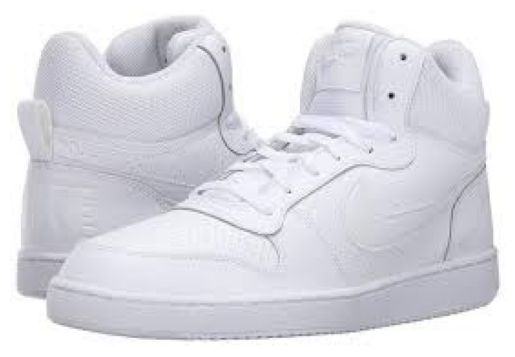

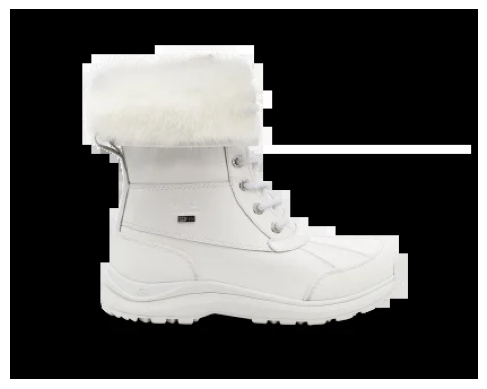

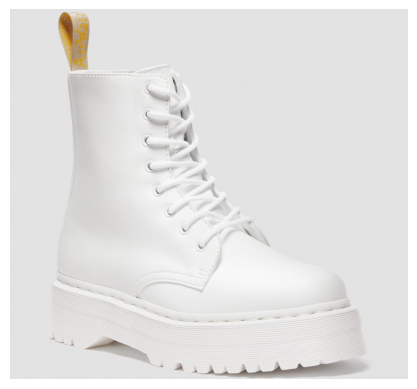

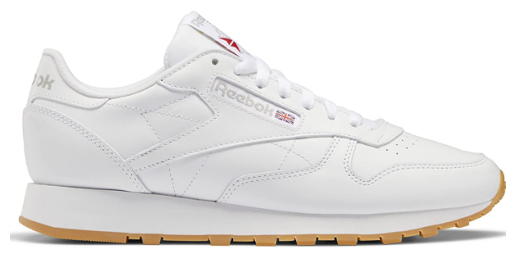

In [4]:
fig = plt.figure(1, figsize = (10, 10))
#fig.suptitle("White Shoe Images")

for i in os.listdir(white_shoes_train_path):

    # Check if the file has a supported image extension

    train_images = image.load_img(white_shoes_train_path + '//' + i)
    plt.imshow(train_images)
    plt.axis('off')
    fig.tight_layout()
    plt.show()


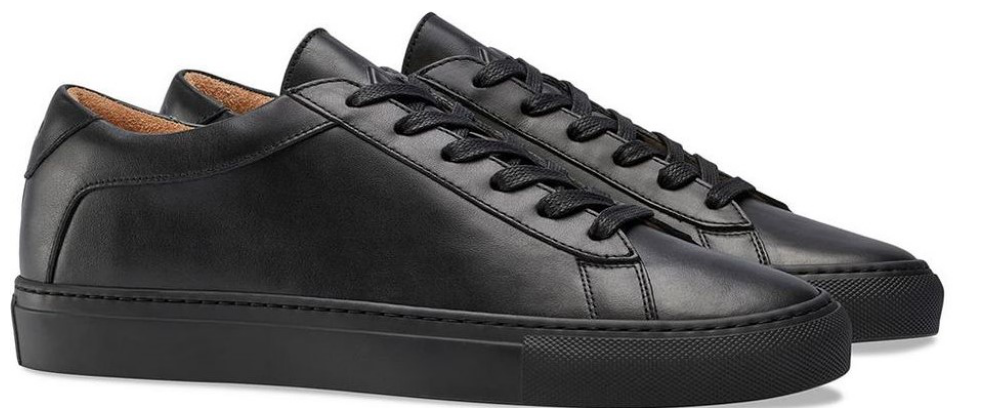

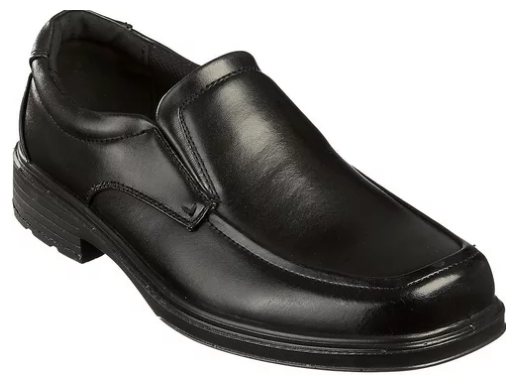

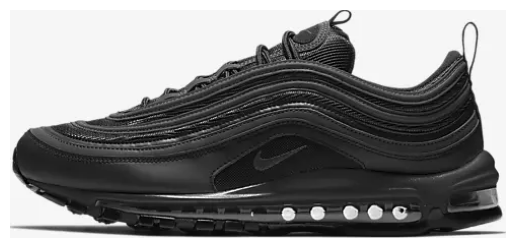

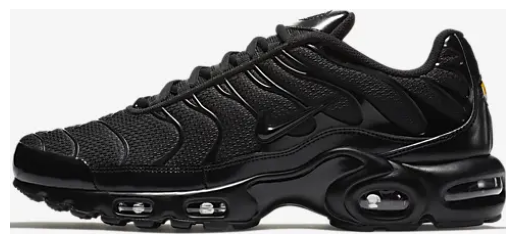

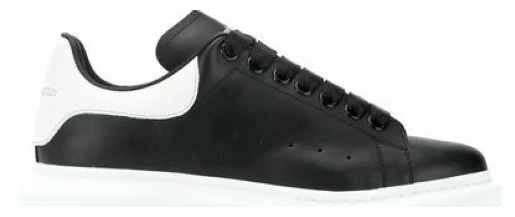

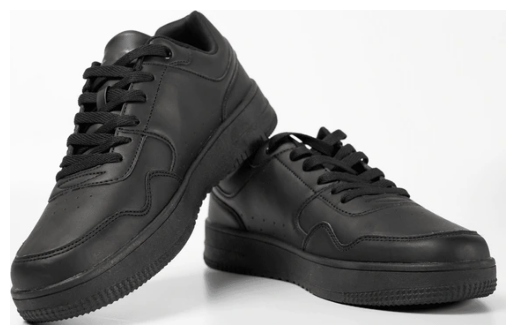

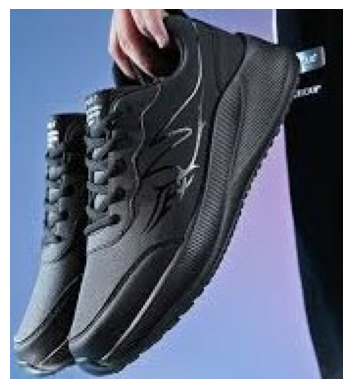

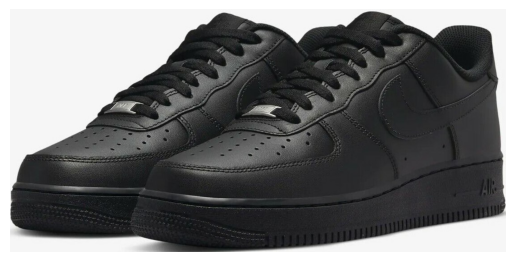

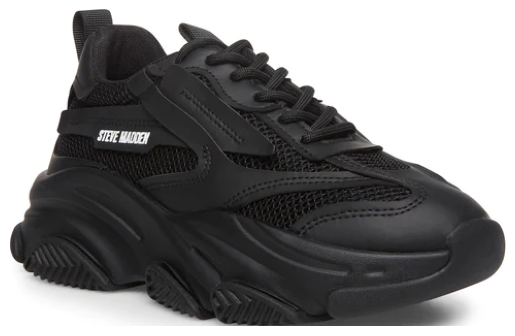

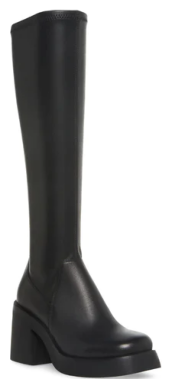

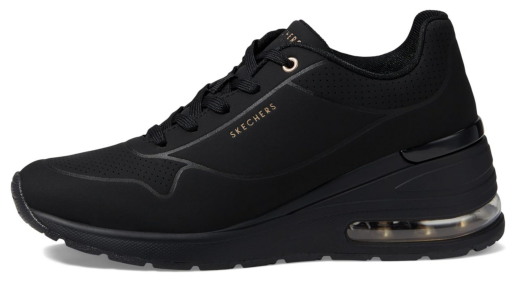

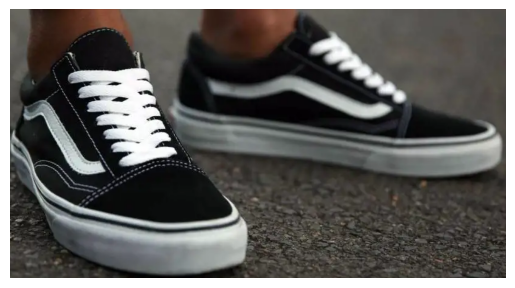

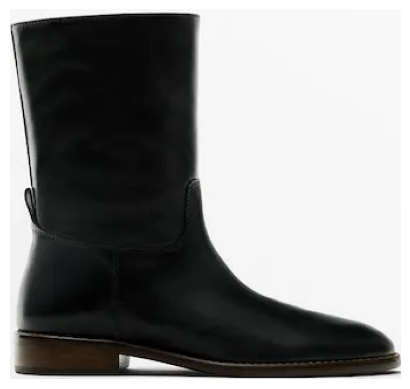

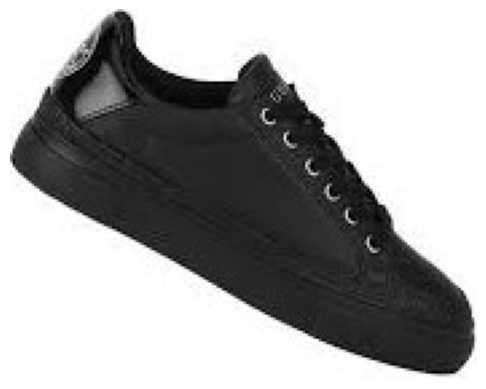

In [5]:
fig = plt.figure(1, figsize = (10, 10))
#fig.suptitle("Black Shoe Images")

for i in os.listdir(black_shoes_train_path):

    # Check if the file has a supported image extension

    black_shoes_train_images = image.load_img(black_shoes_train_path + '//' + i)
    plt.imshow(black_shoes_train_images)
    plt.axis('off')
    fig.tight_layout()
    plt.show()


In [8]:

x_array = []  # array value of images
x_labels = []  # labels of images

datagen = ImageDataGenerator(
    rotation_range=180,
    horizontal_flip=True,
    fill_mode='nearest'
)

for shoeses in os.listdir(X_train_dir):
    shoe_images = os.listdir(os.path.join(X_train_dir, shoeses))

    for shoes in shoe_images:
        img_path = os.path.join(X_train_dir, shoeses, shoes)
        img = image.load_img(img_path, target_size=(331, 331))
        img_array = image.img_to_array(img)
        img_array = preprocess_input(img_array)

        # Expand dimensions to make it a batch of size 1
        img_array = img_array.reshape((1,) + img_array.shape)

        # Generate augmented images
        augmented_images = datagen.flow(img_array)

        for i in range(10):  # Adjust the number of augmented images as needed
            augmented_img = augmented_images.next()[0]  # Take the first image from the batch
            x_array.append(augmented_img)
            x_labels.append(train_class.index(shoeses))

x_array = np.array(x_array)
x_labels = np.array(x_labels)


In [9]:
x_array

array([[[[151.061   , 138.22101 , 131.32    ],
         [151.061   , 138.22101 , 131.32    ],
         [151.061   , 138.22101 , 131.32    ],
         ...,
         [151.061   , 138.22101 , 131.32    ],
         [151.061   , 138.22101 , 131.32    ],
         [151.061   , 138.22101 , 131.32    ]],

        [[151.061   , 138.22101 , 131.32    ],
         [151.061   , 138.22101 , 131.32    ],
         [151.061   , 138.22101 , 131.32    ],
         ...,
         [151.061   , 138.22101 , 131.32    ],
         [151.061   , 138.22101 , 131.32    ],
         [151.061   , 138.22101 , 131.32    ]],

        [[151.061   , 138.22101 , 131.32    ],
         [151.061   , 138.22101 , 131.32    ],
         [151.061   , 138.22101 , 131.32    ],
         ...,
         [151.061   , 138.22101 , 131.32    ],
         [151.061   , 138.22101 , 131.32    ],
         [151.061   , 138.22101 , 131.32    ]],

        ...,

        [[151.061   , 138.22101 , 131.32    ],
         [151.061   , 138.22101 , 131.32    ]

test_images = []
test_images_original = []
test_images_label = []

datagen = ImageDataGenerator(
    rotation_range=180,
    shear_range=0.4,
    zoom_range=0.4,
    horizontal_flip=True,
    fill_mode='nearest'
)

for colour in os.listdir(y_test_dir):
    for shoes in os.listdir(y_test_dir + '/' + colour):
        img = image.load_img(y_test_dir + '/' + colour + '/' + shoes, target_size = (331, 331))

        img = image.img_to_array(img)

        test_images_original.append(img.copy())

        img = preprocess_input(img)

        test_images.append(img)

        test_images_label.append(test_class.index(colour))

test_images_label

In [11]:
test_images = []
test_images_original = []
test_images_label = []

datagen = ImageDataGenerator(
    rotation_range=180,
    horizontal_flip=True,
    fill_mode='nearest'
)


for colour in os.listdir(y_test_dir):
    for shoes in os.listdir(y_test_dir + '/' + colour):
        img_path = os.path.join(y_test_dir, colour, shoes)

        img = image.load_img(img_path, target_size=(331, 331))
        img_array = image.img_to_array(img)
        img_array = preprocess_input(img_array)

        # Expand dimensions to make it a batch of size 1
        img_array = img_array.reshape((1,) + img_array.shape)

        # Generate augmented images
        augmented_images = datagen.flow(img_array)

        for i in range(10):  # Adjust the number of augmented images as needed
            augmented_img = augmented_images.next()[0]  # Take the first image from the batch
            test_images_original.append(augmented_img.copy())
            test_images.append(augmented_img)
            test_images_label.append(test_class.index(colour))

In [12]:
x = np.array(x_array)
print(x.shape)

z = to_categorical(x_labels)
print(z.shape)

#test_images_array = np.array(test_images)
#print(test_images_array.shape)

#test_image_label_list = to_categorical(test_images_label)
#print(test_image_label_list.shape)

(280, 331, 331, 3)
(280, 2)


In [13]:
# train test split

X_train, x_test, y_train, y_test = train_test_split(x, z, stratify = z, random_state = 42)

print(X_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(210, 331, 331, 3)
(70, 331, 331, 3)
(210, 2)
(70, 2)


In [14]:
vgg_base_model = VGG16(include_top = False, weights = "imagenet" ,input_shape=(331, 331,3))
vgg_base_model.trainable = False

In [15]:
tf.keras.backend.clear_session() # his helps avoid clutter from old models and layers, especially when memory is limited.

In [16]:
# add drop out layers to prevent overfitting
# increased drop out rate to see if accuracy improved from my default

base_model = Sequential([vgg_base_model, 
                         GlobalMaxPooling2D(),
                         Dense(512, activation = 'relu'),
                         BatchNormalization(),
                         Dropout(0.5),
                         Dense(1024, activation = 'relu'),
                         Dropout(0.5),
                         Dense(2048, activation = 'relu'),
                         Dropout(0.15),
                         Dense(2, activation = 'softmax')])


opt = optimizers.Adam(learning_rate = 0.0001)

base_model.compile(loss = tf.keras.losses.CategoricalCrossentropy(), optimizer = opt, metrics = 'accuracy')

base_model.summary()
Model = 'sequential'

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 10, 10, 512)       14714688  
                                                                 
 global_max_pooling2d (Glob  (None, 512)               0         
 alMaxPooling2D)                                                 
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 1024)              5

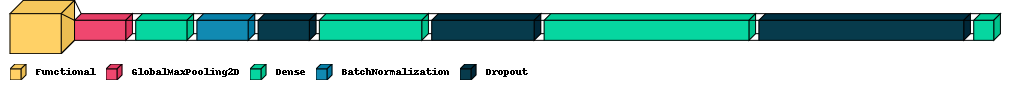

In [17]:
import visualkeras
visualkeras.layered_view(base_model, legend=True) 

Callback - A function that is called repeatedly during a process and which generally serves to validate or correct certain behaviours.

In [18]:
def scheduler(epoch):
    if epoch <= 2:
        return 0.01
    
    elif epoch > 2 and epoch <= 10:
        return 0.001
    
    else:
        return 0.0001
    
lr_callbacks = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [19]:
hist = base_model.fit(X_train, y_train, epochs = 15, callbacks = [lr_callbacks], validation_data = (x_test, y_test))

Epoch 1/15


7/7 [==============================] - 25s 4s/step - loss: 10.6336 - accuracy: 0.6905 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 2/15
7/7 [==============================] - 23s 3s/step - loss: 0.2700 - accuracy: 0.9524 - val_loss: 7.9323 - val_accuracy: 0.9000 - lr: 0.0100
Epoch 3/15
7/7 [==============================] - 24s 4s/step - loss: 0.4458 - accuracy: 0.9762 - val_loss: 19.9982 - val_accuracy: 0.8714 - lr: 0.0100
Epoch 4/15
7/7 [==============================] - 24s 4s/step - loss: 7.2258e-07 - accuracy: 1.0000 - val_loss: 11.3910 - val_accuracy: 0.9000 - lr: 0.0010
Epoch 5/15
7/7 [==============================] - 24s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 7.0881 - val_accuracy: 0.9000 - lr: 0.0010
Epoch 6/15
7/7 [==============================] - 24s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.7888 - val_accuracy: 0.9143 - lr: 0.0010
Epoch 7/15
7/7 [==============================] - 24s 4s/step - loss: 0.1

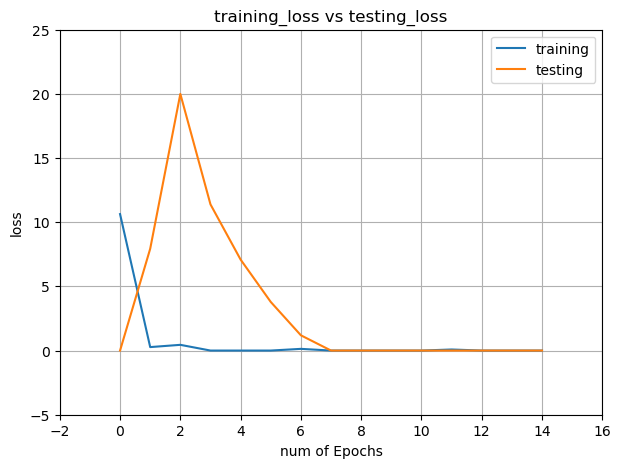

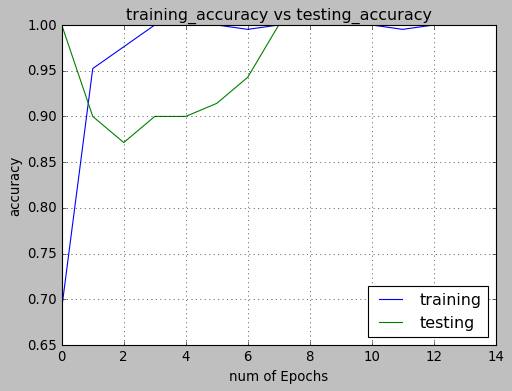

In [20]:
epochs = 15
train_loss = hist.history['loss']
test_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
test_acc = hist.history['val_accuracy']
xc = range(epochs)


plt.figure(1, figsize = (7,5))
plt.plot(xc, train_loss)
plt.plot(xc, test_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('training_loss vs testing_loss')
plt.grid(True)
plt.legend(['training', 'testing'])

# ggplot for big pictures
plt.style.use(['classic'])


plt.figure(2, figsize = (7,5))
plt.plot(xc, train_acc)
plt.plot(xc, test_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('training_accuracy vs testing_accuracy')
plt.grid(True)
plt.legend(['training', 'testing'], loc = 4)

plt.style.use(['classic'])

In [21]:
# unfreezing the base model
# freezing model => retain knowledge learned from a pre-trained model on a specific task i.e.) weights don't change/ parameters don't change
# freezing initial layers preserve general features allowing the model to adapt its task-specific representations to the unfrozen layers
# unfreezing model => trainable meaning allowing their weights to be adjusted during training

base_model.trainable = True

print("Number of layers in the base model: ", len(base_model.layers))

fine_tune_at = 100

## Freezing the initial 100 layers
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# It's important to recompile your model after you make any changes
# to the `trainable` attribute of any inner layer, so that your changes
# are take into account
base_model.compile(optimizer=optimizers.Adam(1e-5),  # Very low learning rate
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Number of layers in the base model:  10


In [22]:


from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# earlystop is a callback that stops the training when the monitored metric (eg. validation/test loss or accuracy) stops improving after a certain amount of epochs ('patience')
earlystop = EarlyStopping(patience=5) # stop at epoch = 10 if the monitored metric stops improving
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', # Metric to monitor for learning rate reduction
                                            patience=2,  # Number of epochs with no improvement after which learning rate will be reduced
                                            verbose=1, # Verbosity mode (1: update messages, 0: silent)
                                            factor=0.5, # Factor by which the learning rate will be reduced. New_lr = lr * factor
                                            min_lr=0.00001) # Lower bound on the learning rate

In [23]:
callbacks2 = [earlystop, learning_rate_reduction]

epoches = 30
hist_final = base_model.fit(X_train, y_train,initial_epoch=hist.epoch[-1], epochs=epoches,callbacks=callbacks2, validation_data=(x_test,y_test))

Epoch 15/30


d:\Anaconda\envs\dev\lib\site-packages\keras\src\backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


7/7 [==============================] - 25s 4s/step - loss: 0.1068 - accuracy: 0.9905 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 1.0000e-05
Epoch 16/30
7/7 [==============================] - 24s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 1.0000e-05
Epoch 17/30
7/7 [==============================] - 25s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 1.0000e-05
Epoch 18/30
7/7 [==============================] - 24s 4s/step - loss: 0.1599 - accuracy: 0.9952 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 1.0000e-05
Epoch 19/30
7/7 [==============================] - 24s 3s/step - loss: 0.4298 - accuracy: 0.9905 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 1.0000e-05
Epoch 20/30
7/7 [==============================] - 24s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 1.0000e-05


as you can see, if done properly, epochs end after 10 (20/40) because I said max epochs is 40 and after patience = 10 (at 20), if it doesn't improve much, just stop

In [24]:
# create variables to plot the new unfrozen learning

train_acc_final = train_acc + hist_final.history['accuracy']
test_acc_final = test_acc + hist_final.history['val_accuracy']

train_loss_final = train_loss + hist_final.history['loss']
test_loss_final = test_loss + hist_final.history['val_loss']

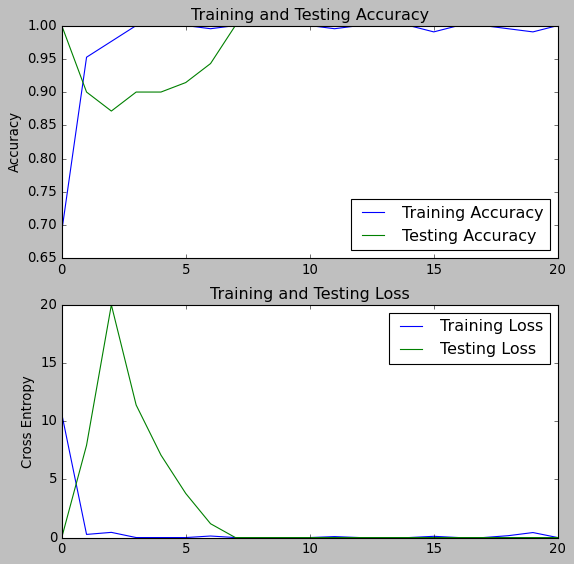

In [26]:
# plot the train/test accuracies and losses
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(train_acc_final, label='Training Accuracy')
plt.plot(test_acc_final, label='Testing Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Testing Accuracy')


# Cross-entropy measures the "distance" or dissimilarity between the true distribution of the data and the predicted distribution provided by a model
# Widely used as a loss function, especially in scenarios like multi-class classification tasks.
plt.subplot(2, 1, 2)
plt.plot(train_loss_final, label='Training Loss')
plt.plot(test_loss_final, label='Testing Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Testing Loss')
plt.show()

In [27]:
base_model.save_weights("shoes_colour_clasification_model.h5")

In [28]:
# function for predicting images

def prediction(img_path):
    pred_img = image.load_img(img_path, target_size = (331, 331))
    pred_img = image.img_to_array(pred_img, dtype = np.uint8)
    pred_img = np.array(pred_img)
    return pred_img

In [39]:
predict_pictures_path = "predict_pictures"
predicted_image_test = prediction("predict_pictures/predict_black_shoe3.jpg")

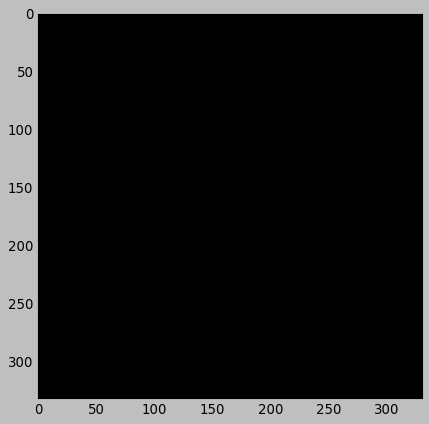

In [40]:
plt.imshow(predicted_image_test)

In [41]:
p=base_model.predict(predicted_image_test[np.newaxis, ...])
labels = {0: 'black', 1: 'white'}
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Classified:", predicted_class, "\n\n")

1/1 [==============================] - 0s 127ms/step
Classified: white 




In [42]:
print("Predicted Probabilities:", p[0])

Predicted Probabilities: [0. 1.]
